In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
from math import floor
from scipy.optimize import curve_fit as cf
import scipy.stats as stats

In [2]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [3]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

In [4]:
from statsmodels.api import tsa

autocorr = lambda x : tsa.acf(x,nlags=len(x))

In [5]:
def t_coherencia(df):
    acorr = autocorr(df.V1)
    acorr = acorr/np.max(acorr)
    tiempos = np.array(df.t-df.t[0])

    index = np.where(acorr < max(acorr/2))[0][0]

    tau = tiempos[index]  
    
    plt.plot(tiempos,acorr,zorder=1,label='Datos')
    plt.scatter(tiempos[index],acorr[index],c='crimson',zorder=2,label=f'\u03C4 = {np.round(tau,dcmls(tau))}')
    plt.grid()
    plt.xlabel('t [s]')
    plt.ylabel('g [u.a.]')
#    plt.legend()
    plt.tight_layout()
#    plt.show()
    
    return tau

['1.1 V', '2.0 V', '3.1 V', '4.3 V', '5.1 V']
0.031299999999999994
0.021699999999999997
0.016200000000000006
0.0131
0.0076999999999999985


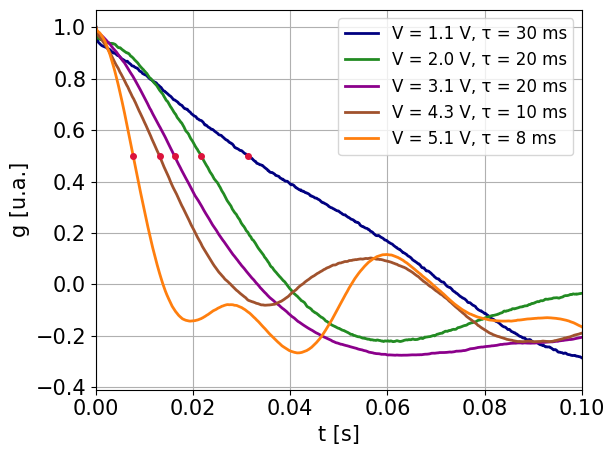

In [21]:
voltajes = os.listdir('clase3/disco/tiempo coherencia')
voltajes.sort()
voltajes = voltajes[2:]
print(voltajes)
c_list = ['navy','forestgreen','darkmagenta','sienna','tab:orange']


for i,voltaje in enumerate(voltajes):
    df = pd.read_csv(f'clase3/disco/tiempo coherencia/{voltaje}/0.csv')

    acorr = autocorr(df.V1)
    acorr = acorr/np.max(acorr)
    tiempos = np.array(df.t-df.t[0])

    index = np.where(acorr < max(acorr/2))[0][0]

    tau = tiempos[index]  

    if voltaje != '5.1 V':
        plt.plot(tiempos,acorr,zorder=1,c=c_list[i],label=f'V = {voltaje}, \u03C4 = {int(np.round(tau*1000,-1))} ms')
    else:
        plt.plot(tiempos,acorr,zorder=1,c=c_list[i],label=f'V = {voltaje}, \u03C4 = {int(np.round(tau*1000,0))} ms')
    plt.scatter(tiempos[index],acorr[index],c='crimson',zorder=2)#,label=f'\u03C4 = {np.round(tau,dcmls(tau))}')
    
    print(tau)

plt.grid()
plt.xlabel('t [s]')
plt.ylabel('g [u.a.]')
plt.legend(fontsize=12)
plt.xlim(0,0.1)
plt.tight_layout()
plt.savefig('plots/autocorr.png')